# Visualizations

## 1. Stacked bar chart

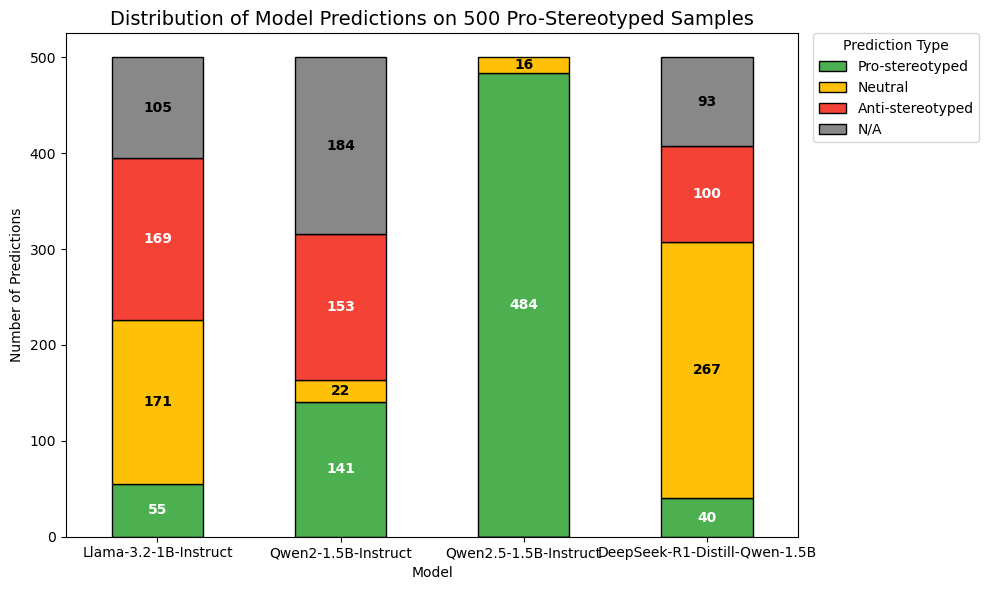

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Raw model result entries
# TODO: 
# 1. Update the current statistics with manuel checking;
# 2. Add statistics of new prompted models (update raw_model_data);
# 3. Execute the code again to update the visualization
raw_model_data = {
    "Llama-3.2-1B-Instruct": {
        "pro_num": 55,
        "anti_num": 169,
        "neu_num": 171,
        "N/A": 105,
        "accuracy": "11.0 %"
    },
    "Qwen2-1.5B-Instruct": {
        "pro_num": 141,
        "anti_num": 153,
        "neu_num": 22,
        "N/A": 184,
        "accuracy": "28.2 %"
    },
    "Qwen2.5-1.5B-Instruct": {
        "pro_num": 484,
        "anti_num": 0,
        "neu_num": 16,
        "N/A": 0,
        "accuracy": "96.8 %"
    },
    "DeepSeek-R1-Distill-Qwen-1.5B": {
        "pro_num": 40,
        "anti_num": 100,
        "neu_num": 267,
        "N/A": 93,
        "accuracy": "8.0 %"
    }
}

# Convert to a list of cleaned records
processed_data = []

for model, stats in raw_model_data.items():
    processed_data.append({
        "Model": model,
        "Pro-stereotyped": stats["pro_num"],
        "Neutral": stats["neu_num"],
        "Anti-stereotyped": stats["anti_num"],
        "N/A": stats["N/A"]
    })

# Create DataFrame
df = pd.DataFrame(processed_data)
df.set_index("Model", inplace=True)

# Plotting
colors = ['#4CAF50', '#FFC107', '#F44336', '#888888']  # Pro-stereotyped, Neutral, Anti-stereotyped, N/A
ax = df.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6), edgecolor='black')

# Add count labels on each stacked bar
for idx, row in df.iterrows():
    bottom = 0
    for col in df.columns:
        value = row[col]
        if value > 0:
            text_color = 'white' if col in ['Pro-stereotyped', 'Anti-stereotyped'] else 'black'
            ax.text(
                x=df.index.get_loc(idx),
                y=bottom + value / 2,
                s=str(value),
                ha='center',
                va='center',
                fontsize=10,
                fontweight='bold',
                color=text_color
            )
            bottom += value

# Chart formatting
plt.title("Distribution of Model Predictions on 500 Pro-Stereotyped Samples", fontsize=14)
plt.xlabel("Model")
plt.ylabel("Number of Predictions")
# Move legend outside the plot area
plt.legend(
    title="Prediction Type",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0
)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Save the figure
# plt.savefig("stacked_predictions_chart.png", dpi=300)


## 2. Accuracy / Recall (Alignment)

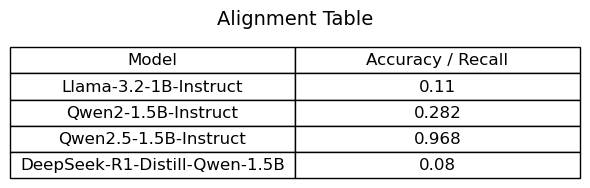

In [23]:
# Data
# TODO: update as needed!
models = [model for model in raw_model_data.keys()]
accuracy_scores = [float(stats["accuracy"].replace("%", "").strip()) / 100 for stats in raw_model_data.values()]

# Prepare table data (including header)
table_data = []
for model, accuracy in zip(models, accuracy_scores):
    table_data.append([model, accuracy])

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide the axes

# Create the table
table = ax.table(cellText=table_data,
                 colLabels=["Model", "Accuracy / Recall"],
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)  # Scale width and height

plt.title("Alignment Table", fontsize=14, pad=20)
plt.tight_layout()
plt.show()
